In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，画层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')  # 读取训练数据
city=data['City'].drop_duplicates().values
City=data['city'].drop_duplicates().values

In [3]:
dataPOP=data.iloc[:,3+27*5:21+27*5].fillna(0)###获取POP的数据
dataGDP=data.iloc[:,22+27*5:40+27*5].fillna(0)###获取GDP的数据
dataM = data.iloc[:,12:30].fillna(0)###投资金额
dataTimes = data.iloc[:,12+27:30+27].fillna(0)###投资次数

In [4]:
dataM[0:1]

,2000总投资金额(M),2001总投资金额(M),2002总投资金额(M),2003总投资金额(M),2004总投资金额(M),2005总投资金额(M),2006总投资金额(M),2007总投资金额(M),2008总投资金额(M),2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M)
0,0.0,0.0,0.0,0.0,0.0,0.0,8.72638,0.0,0.0,463.6,0.0,600.0,0.0,0.0,0.0,0.0,43.6,0.0


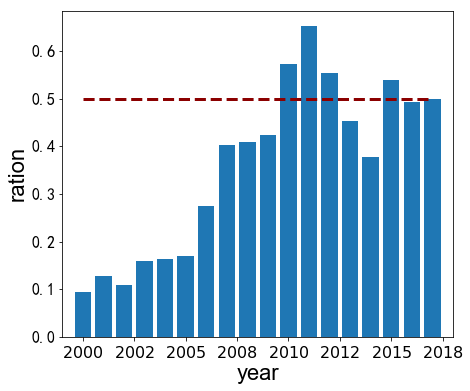

In [6]:
row=data.shape[0]
from matplotlib.ticker import FuncFormatter   ### 今天的主角
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
x=np.arange(2000,2018,1)
# y=dataM.count().values/211
y = (row-(dataM == 0).astype(int).sum(axis=0))/row
# plt.title('2000-2017年投资城市所占比例')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
plt.xlabel('year',font2)
plt.ylabel('ration',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
y2=[0.5 for i in range(2000,2018)]

def formatnum2(x, pos):
    return '$%.0f$' % x
formatter2 = FuncFormatter(formatnum2)
ax1.xaxis.set_major_formatter(formatter2)

plt.xlim(2000-1, 2018)
plt.bar(x,y)
plt.plot(x,y2,color='darkred',linestyle='--',linewidth=3)
plt.savefig('E:/vcdata/pic/picSC/Fig0(city number percent).pdf')

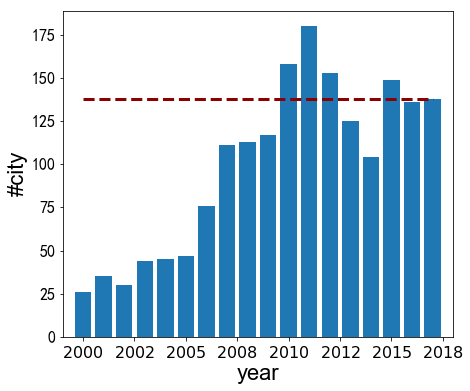

In [7]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
x=np.arange(2000,2018,1)
# y=dataM.count()
y = row-(dataM == 0).astype(int).sum(axis=0)
# plt.title('2000-2017年投资城市所占比例')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
plt.xlabel('year',font2)
plt.ylabel('#city',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)
y2=[row*0.5 for i in range(2000,2018)]

def formatnum2(x, pos):
    return '$%.0f$' % x
formatter2 = FuncFormatter(formatnum2)
ax1.xaxis.set_major_formatter(formatter2)

plt.xlim(2000-1, 2018)
plt.bar(x,y)
plt.plot(x,y2,color='darkred',linestyle='--',linewidth=3)
plt.savefig('E:/vcdata/pic/picSC/Fig0(city number).pdf')